### What is Kernel Trick ?
The kernel trick is a shortcut used in Support Vector Machines (SVMs) to classify data that isn't easily separated by a straight line. It avoids the computationally intensive process of actually transforming the data into a higher-dimensional space. Instead, it uses a special function called a "kernel" to calculate relationships between data points as if they were in that higher dimension. This allows SVMs to create complex, curved decision boundaries efficiently.

 

This kernel trick allows SVMs to find the best possible dividing line (hyperplane) with the largest margin, even when the data can't be separated by a straight line in its original form. Kernel functions calculate the relationships between data points as if they were in a higher-dimensional space, without actually having to move the data there. This clever shortcut makes it much faster to work with complex data that would otherwise require huge amounts of computation.

SVMs commonly use three main types of kernels: linear, polynomial, and Gaussian (also known as radial basis function or RBF). The right kernel depends on the data and the specific problem. A linear kernel works well when the data can be separated by a straight line. A polynomial kernel is better for data with complex, curved boundaries. The Gaussian kernel is used when the data has no clear separation and the classes overlap in complex ways.

Let's illustrate the kernel trick with an example. Imagine we have a binary classification problem with red and blue data points. In their original two-dimensional space, these points can't be separated by a straight line, as shown in the plot below.



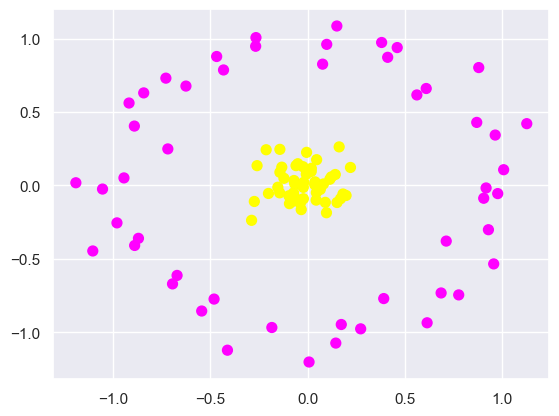

In [8]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# use seaborn plotting defaults
import seaborn as sns; sns.set()

#it creates concentric circles of data points.
features, labels = make_circles(100, factor=.1, noise=.1)
plt.scatter(features[: ,0], features[:, 1], c=labels, s=50, cmap='spring');
plt.show()

To solve the problem of non-linearly separable data, we use the kernel trick. This trick effectively transforms the data into a higher-dimensional space where a straight line(or hyperplane) can separate the classes. The plot below demonstrates this, showing how the red and blue points, sfter the kernel transformation, can now be divided by a plane in a 3D space.

In [11]:

import matplotlib.pyplot as plt



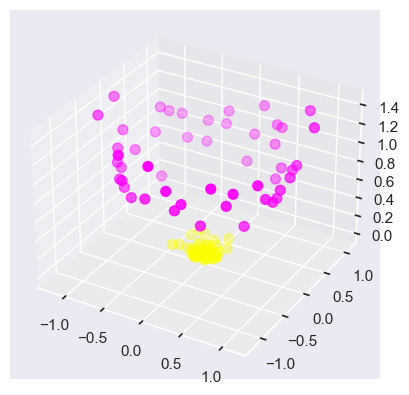

In [15]:
%matplotlib inline
from mpl_toolkits import mplot3d


ax = plt.axes(projection='3d')

# 3rd axis possible functions (features_1**2 + feature_2**2)
d = ((features[:, 0] ** 2) + (features[:, 1] ** 2))

# Data for three-dimensional scattered points
zdata = d
xdata = features[:, 0]
ydata = features[:, 1]
ax.scatter3D(xdata, ydata, zdata, c=labels, cmap='spring', s=50);
plt.show()

By adding this extra dimension, the data becomes easily separable by a plane, for example, at r=0.3. Imagine you're at the origin (center); the yellow points would be closer, while the pink points would be farther away. Now, a simple linear plane can divide the two groups. These transformations are called kernels. Common kernels include the Polynomial Kernel and the Radial Basis Function (RBF) Kernel.

In our example, we had to carefully choose and adjust the projection. If the radial basis function hadn't been centered in the right place, the separation wouldn't have been so clear. This need for careful selection is a general problem; ideally, we'd want to automatically find the best basis functions.

One way to achieve this is to create a basis function centered at every data point and then let the SVM algorithm figure out the best fit. In scikit-learn, using a kernelized SVM is as simple as changing the kernel hyperparameter from linear to rbf (radial basis function):

In [18]:
from sklearn.svm import SVC

In [20]:
clf = SVC(kernel='rbf',C=1E6)
clf.fit(features, labels)

SVC(C=1000000.0)

In [22]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(features, labels)


SVC(C=1000000.0)

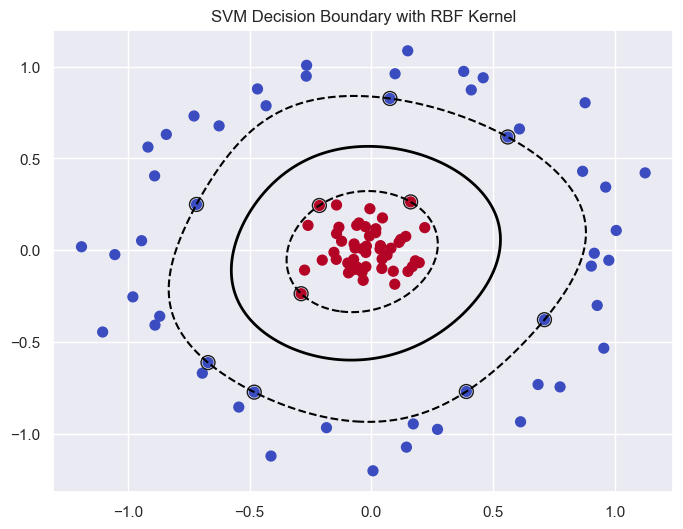

In [24]:
# Plotting
plt.figure(figsize=(8, 6))

# Scatter the training data
plt.scatter(features[:, 0], features[:, 1], c=labels, cmap='coolwarm', s=50)

# Create a grid to evaluate the model
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 500),
                     np.linspace(ylim[0], ylim[1], 500))

# Predict over the grid
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary and margins
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')
plt.contour(xx, yy, Z, levels=[-1, 1], linestyles=['--', '--'], colors='black')

# Highlight support vectors
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=100, linewidth=1, facecolors='none', edgecolors='k')

plt.title("SVM Decision Boundary with RBF Kernel")
plt.show()

As we saw in the previous section choosing the right kernel is crucial, because if the transformation is incorrect, then the model can have very poor results. As a rule, always check if you have linear data and in that case always use linear kernel.